In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import moon_classification_problem as mcp
from moon_classification_problem import moon_plot

In [2]:
# turn off interactive mode
plt.ioff()

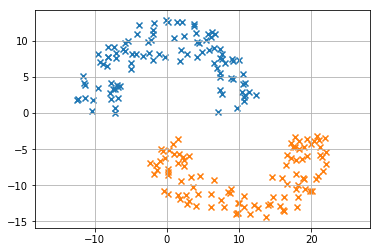

In [3]:
# testing the moon problem class
d, num_points = 3, 100
test_moon_problem = mcp.MoonProblem(d)
sample = test_moon_problem._generate_data_points(num_points)
fig = plt.figure()
moon_plot(fig.add_subplot(111), sample)
plt.show()

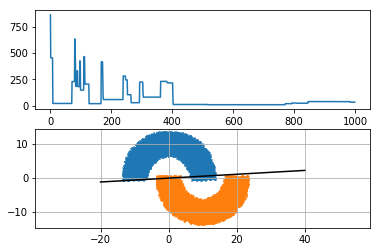

In [4]:
# Single sample correction algorithm of perceptron
zero_separation_moon = mcp.MoonProblem(d=0)
w = np.array([0, 0, 0])
# w[0] + w[1] * x + w[2] * y = 0 is the separating plane
eta = 0.1
training_sample = zero_separation_moon.get_training_sample()
test_sample = zero_separation_moon.get_test_sample()
iterations = training_sample[0][0].size
d_eta = (0.00001 - 0.1) / iterations
(xa, ya), (xb, yb) = training_sample
ones = np.ones(test_sample[0][0].size)

def updated_weight(x, d):
    if w.dot(x) > 0 and d == 1: return w
    if w.dot(x) <= 0 and d == -1: return w
    return w + eta * x * d

def mse():
    a, b = test_sample
    class_a = np.vstack((ones, *a))
    class_b = np.vstack((ones, *b))
    a_error = np.count_nonzero(class_a.T @ w  <= 0)
    b_error = np.count_nonzero(class_b.T @ w > 0)
    return a_error + b_error

errors = []

for x1, y1, x2, y2 in zip(xa, ya, xb, yb):
    w = updated_weight(np.array([1, x1, y1]), 1)
    w = updated_weight(np.array([1, x2, y2]), -1)
    errors.append(mse())
    eta += d_eta

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(errors)
ax2 = moon_plot(fig.add_subplot(212), test_sample)
x = np.linspace(-20, 40, 50)
ax2.plot(x, -(w[0] + w[1] * x) / w[2], 'black')
plt.show()